# Mini Project 1

## Signal Timing Control Module

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/project

/content/drive/MyDrive/project


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import pickle              #To save your trained model so you can use it later without retraining.

# Load your CSV data
df = pd.read_csv('dataset.csv')  # Make sure to replace 'your_file_name.csv' with the actual file name


In [ ]:
# Basic EDA: head, tail, describe, info, shape

# Display the first 5 rows of the DataFrame
print(df.head())


   lv  2_wheeler  hv  total_time
0   2         10   1          12
1   3          5   1           9
2   5          4   1          10
3   2          5   1           8
4   3          7   1          11


In [ ]:
# Display the last 5 rows of the DataFrame
print(df.tail())

     lv  2_wheeler  hv  total_time
995  12         38   4          51
996  14         47   4          61
997   3         12   4          19
998  13         12   7          32
999   5         26   6          36


In [ ]:
df.shape

(1000, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   lv          1000 non-null   int64
 1   2_wheeler   1000 non-null   int64
 2   hv          1000 non-null   int64
 3   total_time  1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


In [ ]:
df.describe()

,lv,2_wheeler,hv,total_time
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,9.274000,27.948000,4.455000,39.809000
std,4.582349,12.604768,2.846766,13.118178
min,2.000000,4.000000,0.000000,8.000000
25%,5.000000,17.000000,2.000000,30.000000
50%,9.000000,28.000000,4.000000,40.000000
75%,13.000000,39.000000,7.000000,50.000000
max,17.000000,49.000000,9.000000,71.000000


In [ ]:
df.columns

Index(['lv', '2_wheeler', 'hv', 'total_time'], dtype='object')

In [ ]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
lv            0
2_wheeler     0
hv            0
total_time    0
dtype: int64


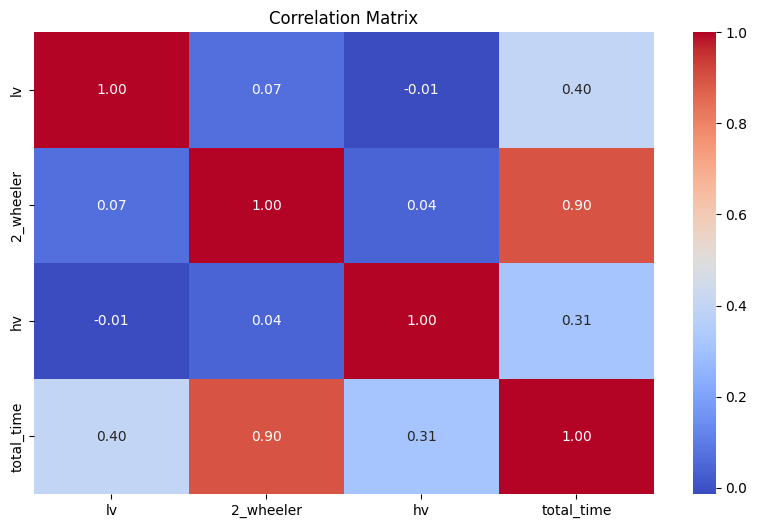

In [ ]:
# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
X = df[['lv', 'hv', '2_wheeler']]  # Features
y = df['total_time']               # Target variable


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# ---- Linear Regression ----
print("\nLinear Regression:")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
# Performance Metrics for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error (LR): {mse_lr}")
print(f"Mean Absolute Error (LR): {mae_lr}")
print(f"R-squared (LR): {r2_lr}")                 #R² provides a measure of how well the model explains the variability of the target variable.


Linear Regression:
Mean Squared Error (LR): 1.6073156368542056
Mean Absolute Error (LR): 0.3409195603617933
R-squared (LR): 0.9904391881993011


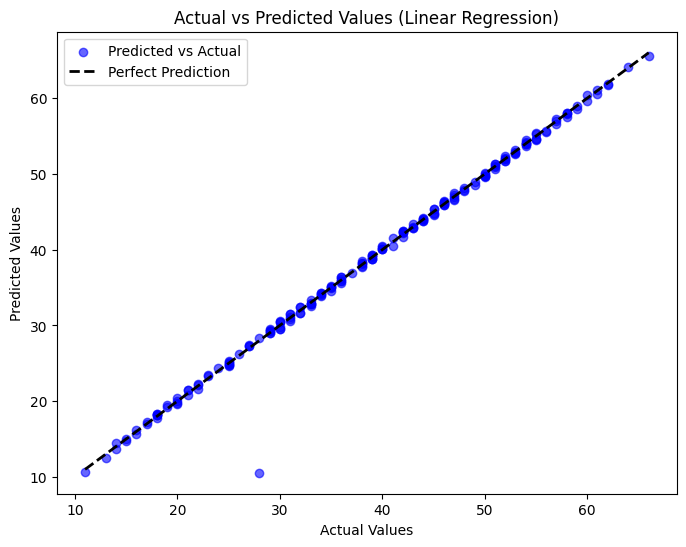

In [ ]:
# Plot Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color="blue", alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Perfect Prediction")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.legend()
plt.show()

In [ ]:
# ---- Decision Tree Regressor ----
print("\nDecision Tree:")
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Performance Metrics for Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Mean Squared Error (DT): {mse_dt}")
print(f"Mean Absolute Error (DT): {mae_dt}")
print(f"R-squared (DT): {r2_dt}")


Decision Tree:
Mean Squared Error (DT): 5.345
Mean Absolute Error (DT): 1.635
R-squared (DT): 0.9682062826348455


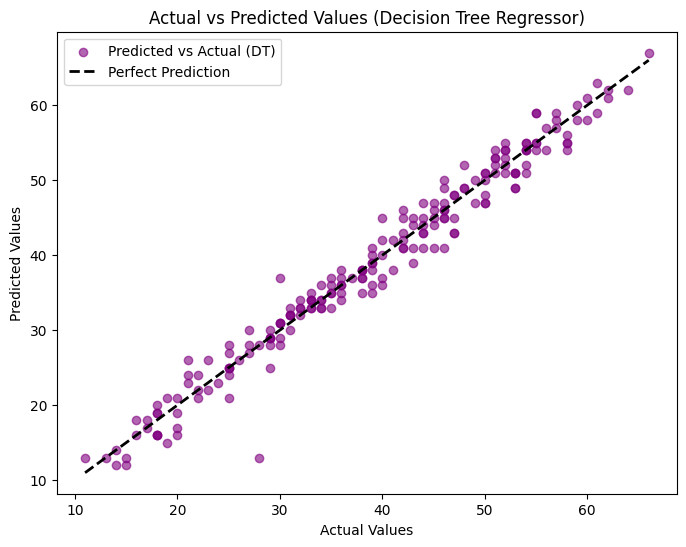

In [ ]:
# Plot Actual vs Predicted values for Decision Tree Regressor
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, color="purple", alpha=0.6, label="Predicted vs Actual (DT)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Perfect Prediction")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Decision Tree Regressor)")
plt.legend()
plt.show()

In [ ]:
# ---- Support Vector Regressor (SVR) ----
print("\nSupport Vector Regressor (SVR):")

# Scaling features for SVR
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

svr_model = SVR(kernel='linear')      #
svr_model.fit(X_train_scaled, y_train_scaled)

# Predictions and inverse scaling
y_pred_svr_scaled = svr_model.predict(X_test_scaled)
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1)).flatten()

# Performance Metrics for SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Mean Squared Error (SVR): {mse_svr}")
print(f"Mean Absolute Error (SVR): {mae_svr}")
print(f"R-squared (SVR): {r2_svr}")



Support Vector Regressor (SVR):
Mean Squared Error (SVR): 1.6544920652441675
Mean Absolute Error (SVR): 0.5509098054282077
R-squared (SVR): 0.9901585681748805


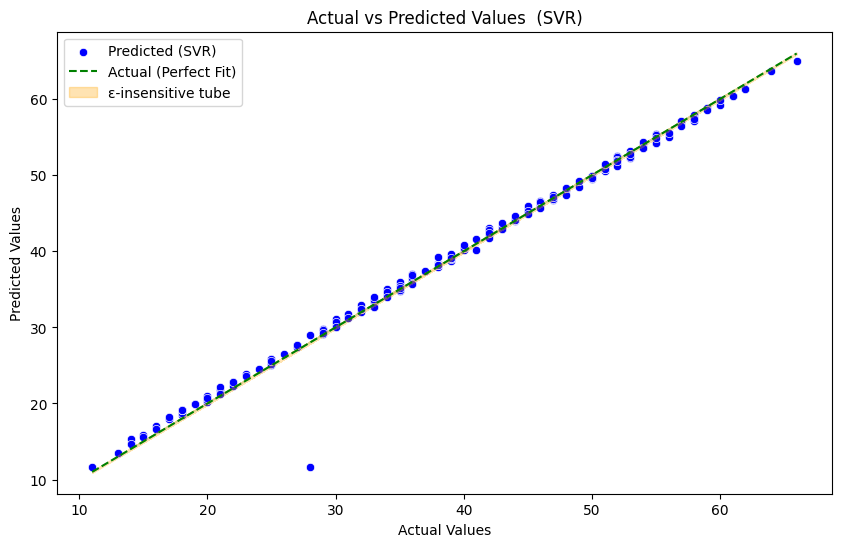

In [ ]:

# Plot Actual vs Predicted values with ε-insensitive tube for SVR
plt.figure(figsize=(10, 6))

# Scatter plot for predicted vs actual values
sns.scatterplot(x=y_test, y=y_pred_svr, label="Predicted (SVR)", color="blue")
sns.lineplot(x=y_test, y=y_test, label="Actual (Perfect Fit)", color="green", linestyle='--')

# Highlighting the epsilon-insensitive tube
epsilon = svr_model.epsilon if hasattr(svr_model, 'epsilon') else 0.1  # Default epsilon for SVR
upper_bound = y_test + epsilon
lower_bound = y_test - epsilon

# Adding the epsilon-insensitive tube to the plot
plt.fill_between(y_test, lower_bound, upper_bound, color='orange', alpha=0.3, label='ε-insensitive tube')

plt.title('Actual vs Predicted Values  (SVR)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [ ]:
# ---- Prediction for New Data ----
new_data = [[13,5,1]]  # Example input for prediction

# Linear Regression prediction
predicted_time_lr = lr_model.predict(new_data)
print(f"Predicted total time (Linear Regression) for input {new_data[0]}: {predicted_time_lr[0]}")

# Decision Tree prediction
predicted_time_dt = dt_model.predict(new_data)
print(f"Predicted total time (Decision Tree) for input {new_data[0]}: {predicted_time_dt[0]}")

# SVR prediction
new_data_scaled = scaler_X.transform(new_data)
predicted_scaled_svr = svr_model.predict(new_data_scaled)
predicted_time_svr = scaler_y.inverse_transform(predicted_scaled_svr.reshape(-1, 1)).flatten()
print(f"Predicted total time (SVR) for input {new_data[0]}: {predicted_time_svr[0]}")


Predicted total time (Linear Regression) for input [13, 5, 1]: 20.021317089249116
Predicted total time (Decision Tree) for input [13, 5, 1]: 27.0
Predicted total time (SVR) for input [13, 5, 1]: 20.178927189886505


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


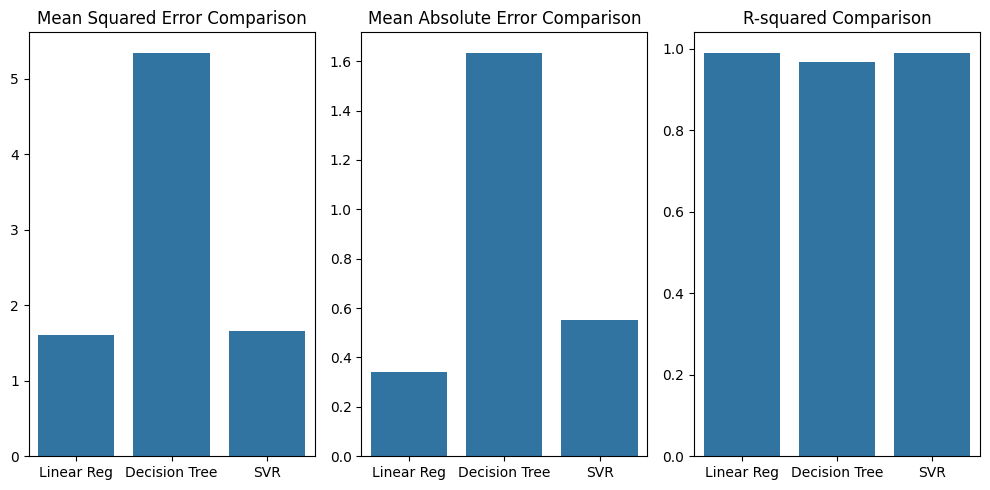

In [ ]:
# ---- Comparison of Models ----
models = ['Linear Reg', 'Decision Tree', 'SVR']
mse_values = [mse_lr, mse_dt, mse_svr]
mae_values = [mae_lr, mae_dt, mae_svr]
r2_values = [r2_lr, r2_dt, r2_svr]

# Barplot for comparing the models
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
sns.barplot(x=models, y=mse_values)
plt.title('Mean Squared Error Comparison')

plt.subplot(1, 3, 2)
sns.barplot(x=models, y=mae_values)
plt.title('Mean Absolute Error Comparison')

plt.subplot(1, 3, 3)
sns.barplot(x=models, y=r2_values)
plt.title('R-squared Comparison')

plt.tight_layout()
plt.show()


In [ ]:


# print("\nHyperparameter Tuning for Decision Tree:")

# # Define the parameter grid
# param_grid = {
#     'max_depth': [3, 5, 10, None],  # Possible values for max tree depth
#     'min_samples_split': [2, 5, 10]  # Minimum samples needed to split a node
# }

# # Initialize Grid Search with cross-validation
# grid_search = GridSearchCV(
#     DecisionTreeRegressor(random_state=42),
#     param_grid,
#     cv=5,               # 5-fold cross-validation
#     scoring='r2'        # Use R-squared as the evaluation metric
# )

# # Fit Grid Search on the training data
# grid_search.fit(X_train, y_train)

# # Output best parameters and R-squared score
# print(f"Best Parameters for Decision Tree: {grid_search.best_params_}")
# print(f"Best R-squared for Decision Tree after tuning: {grid_search.best_score_}")


In [ ]:
# Save the SVR model
with open('svr_model.pkl', 'wb') as model_file:
    pickle.dump(svr_model, model_file)

# Save the scalers
with open('scaler_X.pkl', 'wb') as scaler_X_file:
    pickle.dump(scaler_X, scaler_X_file)

with open('scaler_y.pkl', 'wb') as scaler_y_file:
    pickle.dump(scaler_y, scaler_y_file)

In [ ]:
|